# Compute proportion of damaged part of a crop

### The aim of this notebook is:
### 1.to find the values of pixels that belong on an ear and on the damaged part of the ear. 
### 2.segment the damaged part 
### 3.count how many pixels belong to it and
### 4.finally,  find the proportion of "damaged pixels " out of the total number of pixels
_____________________________________________________________________________________________________________________________

### Part 1: Whole ear processing

#### Insert an image that has an ear with white background

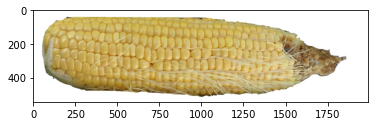

In [44]:
#Whole ear of damged corn
%matplotlib inline
import matplotlib.pylab as plt
from ipywidgets import interact, fixed
import numpy as np
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave



file2='damaged_corn.jpg'
corn=imread(file2)
    
#Show the image
plt.imshow(corn);


#### Plot image based in Hue, Saturation and Value and compare with the original

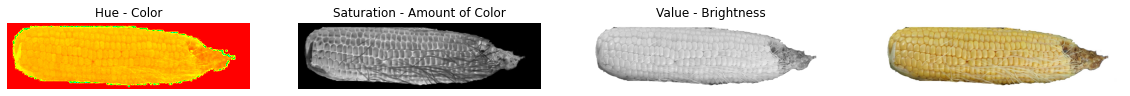

In [45]:
import colorsys
import matplotlib.colors as colors


corn_hsv = colors.rgb_to_hsv(corn)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.imshow(corn_hsv[:,:,0], cmap='hsv')
ax1.set_title('Hue - Color')
ax1.set_axis_off()

ax2.imshow(corn_hsv[:,:,1],cmap='gray',vmin=0, vmax=1)
ax2.set_title('Saturation - Amount of Color')
ax2.set_axis_off()

ax3.imshow(corn_hsv[:,:,2],cmap='gray')
ax3.set_title('Value - Brightness')
ax3.set_axis_off()

ax4.imshow(corn)
ax4.set_axis_off()

#### Plot the histogram of hsv values

Text(0.5, 1.0, 'Historgams forhue,saturation and value of a color image')

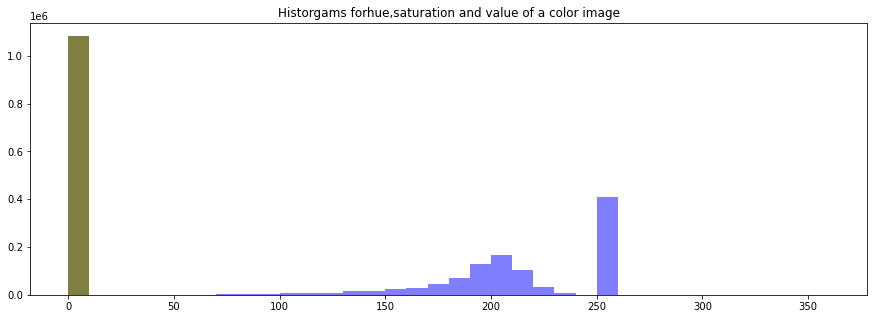

In [46]:
#HSV Histogram snip-it of an image. Each channel calculated separately and displayed in the same image

fig = plt.figure(figsize=(15,5))

plt.hist(corn_hsv[:,:,0].ravel(), alpha=0.5, bins=36, range=(0, 360), color='red');
plt.hist(corn_hsv[:,:,1].ravel(), alpha=0.5, bins=36, range=(0, 360), color='green');
plt.hist(corn_hsv[:,:,2].ravel(), alpha=0.5, bins=36, range=(0, 360), color='blue');
plt.title('Historgams forhue,saturation and value of a color image')

#### Notice that the white part corresponds to zero Hue and Saturation and segment the image to have only the ear

In [47]:
#Use Logical operators for each RGB Color channel
r_threshold = corn_hsv[:,:,0] <10
r2_threshold = corn_hsv[:,:,0] >0
g_threshold = corn_hsv[:,:,1] <10
g2_threshold = corn_hsv[:,:,1] >0

#### Create the binary version of the ear. White pixels correspond to those that satisfy the above conditions

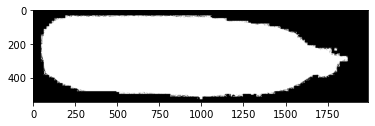

In [48]:
#Use Logical to combine results of each channel
binary_corn = np.logical_and(r_threshold,r2_threshold)
binary_corn = np.logical_and(binary_corn,g_threshold)
binary_corn = np.logical_and(binary_corn,g2_threshold)

plt.imshow(binary_corn ,cmap='gray')

#### Pixels that do not satisfy the conditions are colored black and now we can see the original and segmented image

Text(0.5, 1.0, 'Segmented Image')

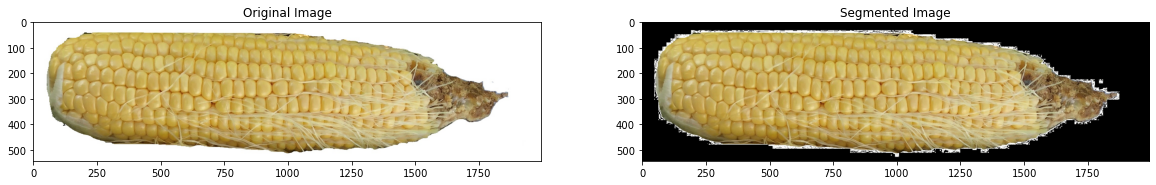

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(corn)
ax1.set_title("Original Image")

corn2 = corn.copy()
corn2[binary_corn==False,:] = 0 #Remove Background
ax2.imshow(corn2)
ax2.set_title("Segmented Image")

### Part 2: Damaged part processing
------------------------------------------------------------------------------------------------------------------------------



## Insert a damage part image with white background. We want to find the HSV values of the damaged part and use it as a reference for future images. Then we will also compute the proportion of damaged pixels for this ear

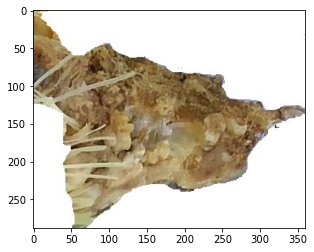

In [50]:
#Damaged part-manually cropped
file='damage_part.jpg'
im = imread(file)
#Show the image
plt.imshow(im);

#### RGB Histogram

Text(0.5, 1.0, 'Historgams for Overlayed Red, Green and Blue Channels of a color image')

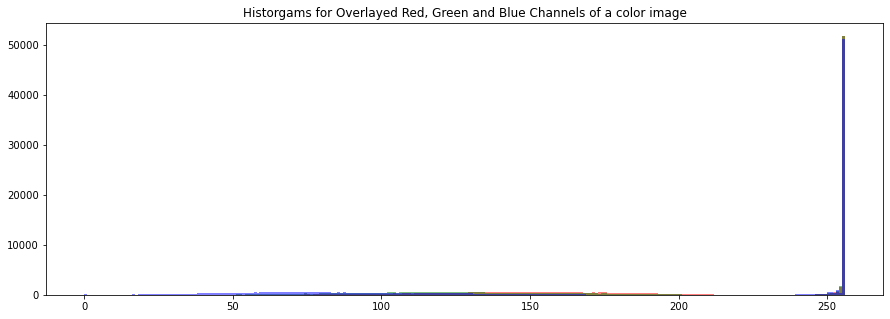

In [51]:
#RGB Histogram snip-it of an image. Each channel calculated separately and displayed in the same image

fig = plt.figure(figsize=(15,5))

plt.hist(im[:,:,0].ravel(), alpha=0.5, bins=256, range=(0, 256), color='red');
plt.hist(im[:,:,1].ravel(), alpha=0.5, bins=256, range=(0, 256), color='green');
plt.hist(im[:,:,2].ravel(), alpha=0.5, bins=256, range=(0, 256), color='blue');
plt.title('Historgams for Overlayed Red, Green and Blue Channels of a color image')

#### Plot image based in Hue, Saturation and Value and compare with the original

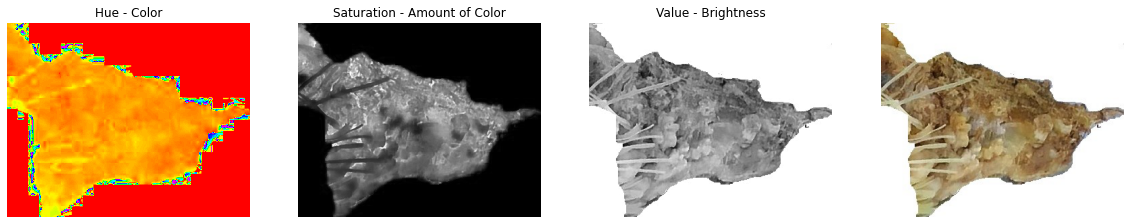

In [52]:
import colorsys
import matplotlib.colors as colors


hsv = colors.rgb_to_hsv(im)
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
ax1.imshow(hsv[:,:,0], cmap='hsv')
ax1.set_title('Hue - Color')
ax1.set_axis_off()

ax2.imshow(hsv[:,:,1],cmap='gray',vmin=0, vmax=1)
ax2.set_title('Saturation - Amount of Color')
ax2.set_axis_off()

ax3.imshow(hsv[:,:,2],cmap='gray')
ax3.set_title('Value - Brightness')
ax3.set_axis_off()

ax4.imshow(im)
ax4.set_axis_off()

#### HSV Histogram

Text(0.5, 1.0, 'Historgams forhue,saturation and value of a color image')

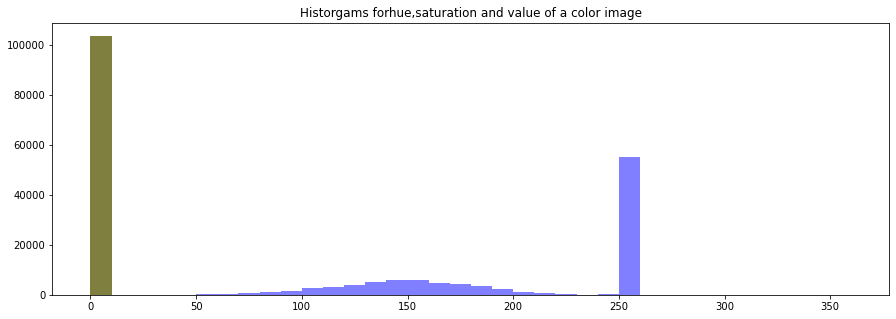

In [53]:
#HSV Histogram snip-it of an image. Each channel calculated separately and displayed in the same image

fig = plt.figure(figsize=(15,5))

plt.hist(hsv[:,:,0].ravel(), alpha=0.5, bins=36, range=(0, 360), color='red');
plt.hist(hsv[:,:,1].ravel(), alpha=0.5, bins=36, range=(0, 360), color='green');
plt.hist(hsv[:,:,2].ravel(), alpha=0.5, bins=36, range=(0, 360), color='blue');
plt.title('Historgams forhue,saturation and value of a color image')

#### Keep only pixels with the values with non-zero frequency, based on the above histogram

In [54]:
#Use Logical operators for each HSV Color channel
r_threshold = hsv[:,:,0] <10
r2_threshold = hsv[:,:,0] >0
g_threshold = hsv[:,:,1] <10
g2_threshold = hsv[:,:,1] >0
b_threshold = hsv[:,:,2] <260
b2_threshold =hsv[:,:,2] >50

#### Color black the pixels that do not satisfy the above conditions

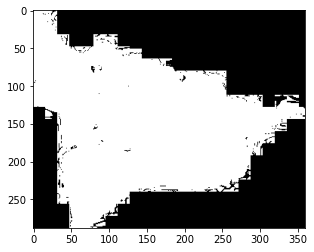

In [55]:
#Use Logical to combine results of each channel
binary_image = np.logical_and(r_threshold,r2_threshold)
binary_image = np.logical_and(binary_image,g_threshold)
binary_image = np.logical_and(binary_image,g2_threshold)
binary_image = np.logical_and(binary_image,b_threshold)
binary_image = np.logical_and(binary_image,b2_threshold)

plt.imshow(binary_image ,cmap='gray')


#### Now we managed to segment only the damaged part

Text(0.5, 1.0, 'Segmented Image')

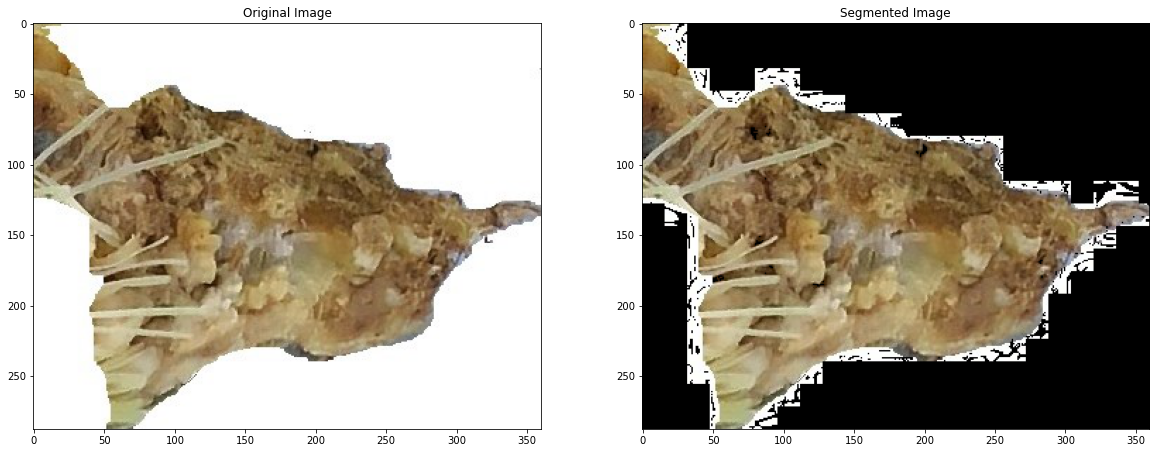

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(im)
ax1.set_title("Original Image")

im2 = im.copy()
im2[binary_image==False,:] = 0 #Remove Background
ax2.imshow(im2)
ax2.set_title("Segmented Image")

****************************************************************************************************************************
### Part 3 : Compute proportion of damaged part

In [57]:
#Number of pixels damaged part
damaged_counts=np.count_nonzero((im2).all(axis = 2))

In [59]:
#Total pixels of one ear
total=np.count_nonzero((corn2).all(axis = 2))


In [60]:
#Frequency 
frequency=damaged_counts/total
frequency

0.07741814608919012

#### We notice that approximately 8% of the ear is damaged. 

******************************************************************************************************************************

## Can we get the same amount if we use as a reference the hsv values of the damaged part?

In [72]:
r_threshold = corn_hsv[:,:,0] <10
r2_threshold = corn_hsv[:,:,0] >0
g_threshold = corn_hsv[:,:,1] <10
g2_threshold = corn_hsv[:,:,1] >0
b_threshold = corn_hsv[:,:,2] <260
b2_threshold =corn_hsv[:,:,2] >50

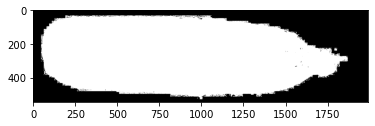

In [74]:
#Use Logical to combine results of each channel
binary_damage = np.logical_and(r_threshold,r2_threshold)
binary_damage = np.logical_and(binary_damage,g_threshold)
binary_damage = np.logical_and(binary_damage,g2_threshold)
binary_damage = np.logical_and(binary_damage,b_threshold)
binary_damage= np.logical_and(binary_damage,b2_threshold)

plt.imshow(binary_damage ,cmap='gray')


### No, we need refine the conditions. Let's find the healthy part hsv histogram

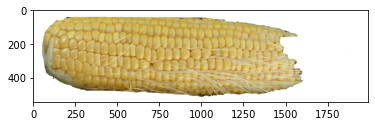

In [76]:
file3='healthy_corn.jpg'
healthy=imread(file3)
    
#Show the image
plt.imshow(healthy);

Text(0.5, 1.0, 'Historgams for hue,saturation and value of a color image')

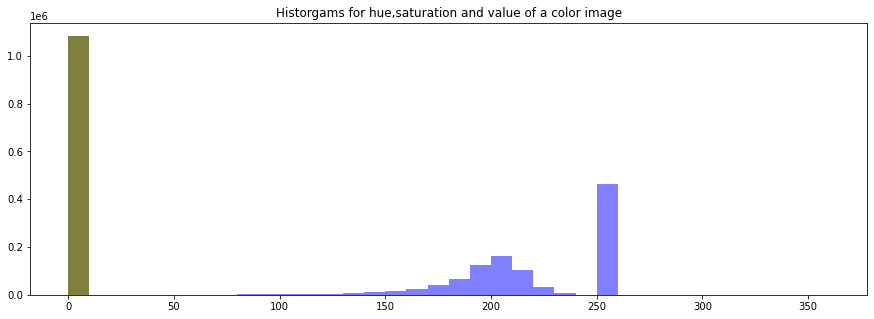

In [77]:
# Convert to hsv and plot hist
healthy_hsv = colors.rgb_to_hsv(healthy)

#HSV Histogram snip-it of an image. Each channel calculated separately and displayed in the same image

fig = plt.figure(figsize=(15,5))

plt.hist(healthy_hsv[:,:,0].ravel(), alpha=0.5, bins=36, range=(0, 360), color='red');
plt.hist(healthy_hsv[:,:,1].ravel(), alpha=0.5, bins=36, range=(0, 360), color='green');
plt.hist(healthy_hsv[:,:,2].ravel(), alpha=0.5, bins=36, range=(0, 360), color='blue');
plt.title('Historgams for hue,saturation and value of a color image')

Text(0.5, 1.0, 'Overlap of value for damaged and healthy parts')

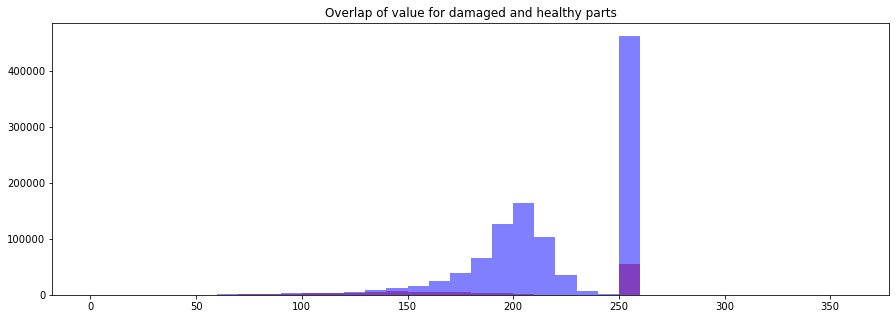

In [100]:
fig = plt.figure(figsize=(15,5))

plt.hist(hsv[:,:,2].ravel(), alpha=0.5, bins=36, range=(0, 360), color='red');
plt.hist(healthy_hsv[:,:,2].ravel(), alpha=0.5, bins=36, range=(0, 360), color='blue');
plt.title('Overlap of value for damaged and healthy parts')

### Notice that the healthy part has high frequency for the range of [150,240] where the damaged part has for [50,200]

In [125]:
r_threshold = corn_hsv[:,:,0] <10
r2_threshold = corn_hsv[:,:,0] >0
g_threshold = corn_hsv[:,:,1] <10
g2_threshold = corn_hsv[:,:,1] >0
b_threshold = corn_hsv[:,:,2] <140

b2_threshold =corn_hsv[:,:,2] >60

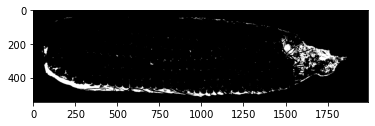

In [126]:
#Use Logical to combine results of each channel
binary_damage = np.logical_and(r_threshold,r2_threshold)
binary_damage = np.logical_and(binary_damage,g_threshold)
binary_damage = np.logical_and(binary_damage,g2_threshold)
binary_damage = np.logical_and(binary_damage,b_threshold)
binary_damage= np.logical_and(binary_damage,b2_threshold)

plt.imshow(binary_damage ,cmap='gray')

Text(0.5, 1.0, 'Segmented Image')

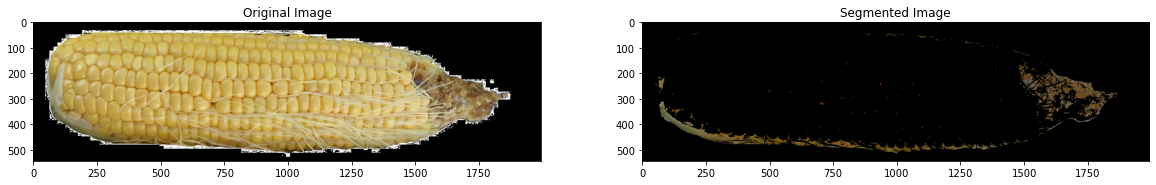

In [127]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
ax1.imshow(corn2)
ax1.set_title("Original Image")

im2 = im.copy()
corn[binary_damage==False,:] = 0 #Remove Background
ax2.imshow(corn)
ax2.set_title("Segmented Image")

In [128]:
damaged_counts=np.count_nonzero((corn).all(axis = 2))
#Total pixels of one ear
total=np.count_nonzero((corn2).all(axis = 2))
#Frequency 
frequency=damaged_counts/total
frequency

0.06575486661241442

###  So according to this method 7% of the ear is damaged. 